In [6]:
import pandas as pd

In [7]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
# definindo colunas porque no dataframe real não tem!
colunas = [
    'status_conta_corrente', 'duracao_mes', 'historico_credito', 'proposito', 'valor_credito', 'poupanca',
    'emprego_atual', 'taxa_instalment', 'estado_civil_sexo', 'outros_devedores', 'residencia_atual_desde',
    'propriedade', 'idade', 'outros_planos_pagamento', 'moradia', 'n_creditos_existentes', 'emprego',
    'n_dependentes', 'telefone', 'trabalhador_estrangeiro', 'classe'
]

In [ ]:
dados_credito = pd.read_csv(url, sep=' ', names=colunas)
# como os dados são antigos os valores de creditos são muito baixo entao vou adicionar um 0 a direita para aumentar os numeros
dados_credito['valor_credito'] = dados_credito['valor_credito'].astype(str)
dados_credito['valor_credito'] = dados_credito['valor_credito'] + '0'
dados_credito['valor_credito'] = dados_credito['valor_credito'].astype(int)

In [9]:
print("Dados das 5 primeiras linhas:")
print(dados_credito.head())

Dados das 5 primeiras linhas:
  status_conta_corrente  duracao_mes historico_credito proposito  \
0                   A11            6               A34       A43   
1                   A12           48               A32       A43   
2                   A14           12               A34       A46   
3                   A11           42               A32       A42   
4                   A11           24               A33       A40   

   valor_credito poupanca emprego_atual  taxa_instalment estado_civil_sexo  \
0          11690      A65           A75                4               A93   
1          59510      A61           A73                2               A92   
2          20960      A61           A74                2               A93   
3          78820      A61           A74                2               A93   
4          48700      A61           A73                3               A93   

  outros_devedores  ...  propriedade idade  outros_planos_pagamento moradia  \
0            

In [10]:
print("\nInformações gerais sobre o conjunto de dados:")
dados_credito.info()


Informações gerais sobre o conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status_conta_corrente    1000 non-null   object
 1   duracao_mes              1000 non-null   int64 
 2   historico_credito        1000 non-null   object
 3   proposito                1000 non-null   object
 4   valor_credito            1000 non-null   int64 
 5   poupanca                 1000 non-null   object
 6   emprego_atual            1000 non-null   object
 7   taxa_instalment          1000 non-null   int64 
 8   estado_civil_sexo        1000 non-null   object
 9   outros_devedores         1000 non-null   object
 10  residencia_atual_desde   1000 non-null   int64 
 11  propriedade              1000 non-null   object
 12  idade                    1000 non-null   int64 
 13  outros_planos_pagamento  1000 non-null   object

Não há dados faltantes assim podemos proceguir para a analise exploratoria!

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
sns.set_theme(style="whitegrid")

In [13]:
#Neste caso o bom e mla pagador era classificado com 1 e 2 para facilitar analise mudaremos para:
# 1 (bom pagador) se tornará 0
# 2 (mau pagador) se tornará 1
dados_credito['classe'] = dados_credito['classe'].map({1: 0, 2: 1})

Distribuição da classe (0 = Bom pagador, 1 = Mau pagador):
classe
0    700
1    300
Name: count, dtype: int64


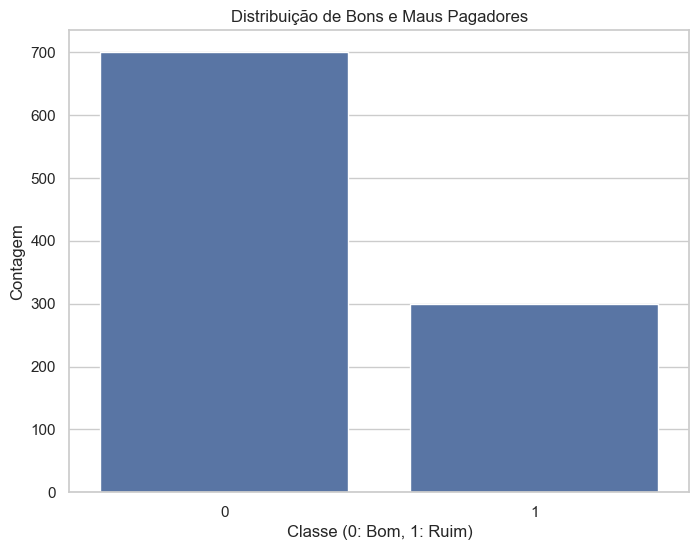

In [14]:
# Contando a quantidade de bons (0) e maus (1) pagadores
print("Distribuição da classe (0 = Bom pagador, 1 = Mau pagador):")
print(dados_credito['classe'].value_counts())

plt.figure(figsize=(8, 6))
sns.countplot(x='classe', data=dados_credito)
plt.title('Distribuição de Bons e Maus Pagadores')
plt.xlabel('Classe (0: Bom, 1: Ruim)')
plt.ylabel('Contagem')
plt.show()

In [15]:
print("\nResumo estatístico das principais colunas numéricas:")
print(dados_credito[['duracao_mes', 'valor_credito', 'idade']].describe())


Resumo estatístico das principais colunas numéricas:
       duracao_mes  valor_credito        idade
count  1000.000000     1000.00000  1000.000000
mean     20.903000    32712.58000    35.546000
std      12.058814    28227.36876    11.375469
min       4.000000     2500.00000    19.000000
25%      12.000000    13655.00000    27.000000
50%      18.000000    23195.00000    33.000000
75%      24.000000    39722.50000    42.000000
max      72.000000   184240.00000    75.000000


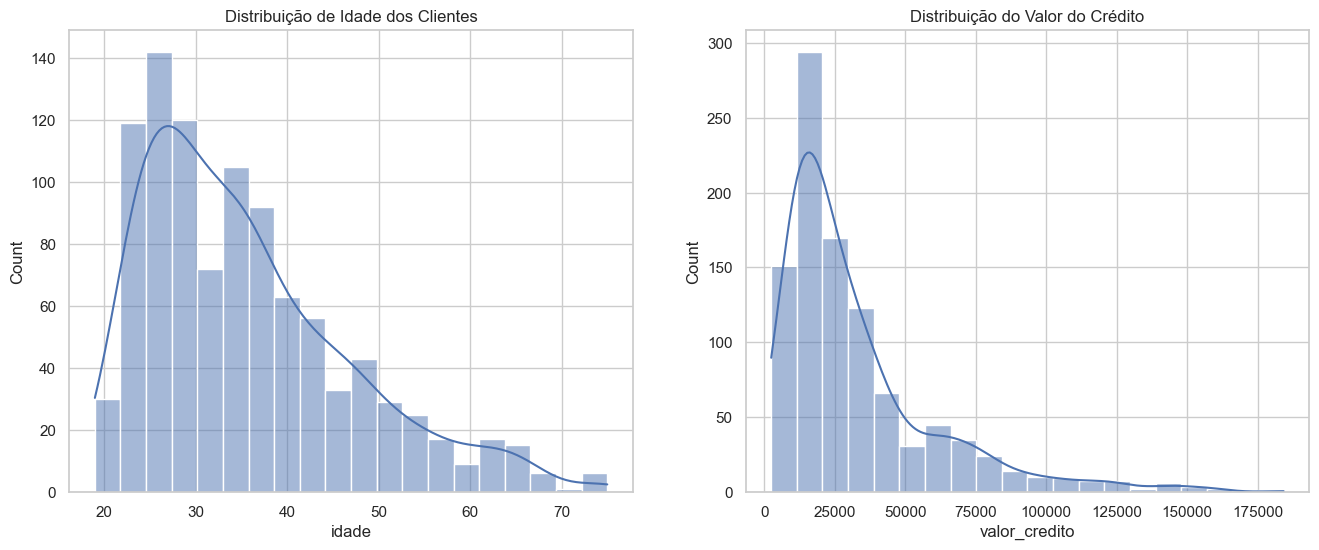

In [16]:
# Criando histogramas para ver a distribuição de Idade e Valor do Crédito
fig, axes = plt.subplots(1, 2, figsize=(16, 6))
                                       
sns.histplot(dados_credito['idade'], ax=axes[0], kde=True, bins=20)
axes[0].set_title('Distribuição de Idade dos Clientes')

sns.histplot(dados_credito['valor_credito'], ax=axes[1], kde=True, bins=20)
axes[1].set_title('Distribuição do Valor do Crédito')

plt.show()

podemos perceber que a maioria dos emprestimos são abaixo de 5000 e a maioria dos clientes tem entre 25 e 40 anos.

-------------------------------

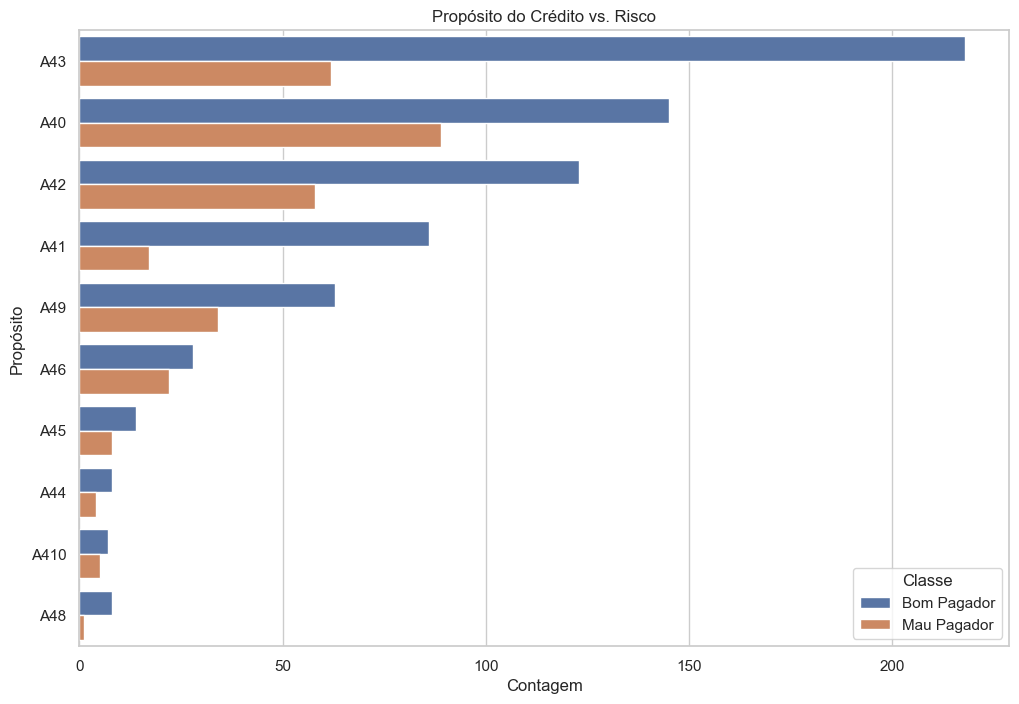

In [17]:
plt.figure(figsize=(12, 8))
# O parâmetro 'hue' separa as barras pela nossa variável 'classe'.
sns.countplot(y='proposito', hue='classe', data=dados_credito, order=dados_credito['proposito'].value_counts().index)
plt.title('Propósito do Crédito vs. Risco')
plt.xlabel('Contagem')
plt.ylabel('Propósito')
plt.legend(title='Classe', labels=['Bom Pagador', 'Mau Pagador'])
plt.show()

Após analisar os dados podemos fazer a predição de credito com machine learning!

Vamos fazer o pré processamento dos dados pois alguns são categóricos e não consegue ser processado no modelo de machine learning.

--------------------------------

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = dados_credito.drop('classe', axis=1)

y = dados_credito['classe']

será usado o metodo One-Hot Encoding onde os dados de texto sera trocado por numeros binarios. Com isso ele criara mais variaveis relacionadas aos dados trocados.

In [20]:
X_encoded = pd.get_dummies(X)

In [21]:
print("Dimensões dos dados após One-Hot Encoding:")
print(X_encoded.shape)
print("\nExemplo das primeiras linhas dos dados transformados:")
print(X_encoded.head())

Dimensões dos dados após One-Hot Encoding:
(1000, 61)

Exemplo das primeiras linhas dos dados transformados:
   duracao_mes  valor_credito  taxa_instalment  residencia_atual_desde  idade  \
0            6          11690                4                       4     67   
1           48          59510                2                       2     22   
2           12          20960                2                       3     49   
3           42          78820                2                       4     45   
4           24          48700                3                       4     53   

   n_creditos_existentes  n_dependentes  status_conta_corrente_A11  \
0                      2              1                       True   
1                      1              1                      False   
2                      1              2                      False   
3                      1              2                       True   
4                      2              2               

Para fazer o treinameto usaremos 80% dos dados e para o teste 20%.

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [23]:
print(f"\nDados de treino (X_train): {X_train.shape}")
print(f"Dados de teste (X_test):  {X_test.shape}")
print(f"Rótulos de treino (y_train): {y_train.shape}")
print(f"Rótulos de teste (y_test):  {y_test.shape}")


Dados de treino (X_train): (800, 61)
Dados de teste (X_test):  (200, 61)
Rótulos de treino (y_train): (800,)
Rótulos de teste (y_test):  (200,)


---------------------------------------

o modelo que usaremos é de classificação com regressão logistica, para classificar se o proximo cliente sera um bom pagador ou um mal!

--------------------------------

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [25]:
modelo = LogisticRegression(max_iter=1000)

In [26]:
#treinamento do modelo
modelo.fit(X_train, y_train)

c:\Users\pedro\OneDrive\Desktop\projeto finança 2\analise_de_credito\venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [27]:
y_pred = modelo.predict(X_test)

In [28]:
acuracia = accuracy_score(y_test, y_pred)
print(f"\nAcurácia do modelo: {acuracia:.2%}")


Acurácia do modelo: 80.00%


In [29]:
print("\nMatriz de Confusão:")
matriz = confusion_matrix(y_test, y_pred)
print(matriz)


Matriz de Confusão:
[[127  14]
 [ 26  33]]


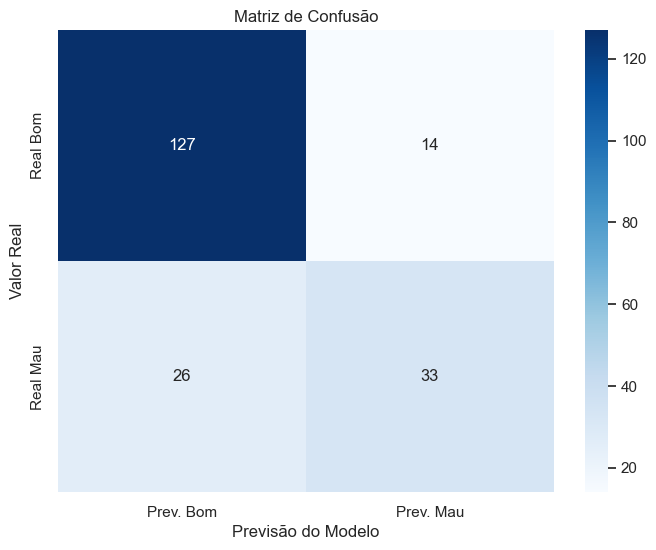

In [30]:
plt.figure(figsize=(8, 6))
sns.heatmap(matriz, annot=True, fmt='d', cmap='Blues', xticklabels=['Prev. Bom', 'Prev. Mau'], yticklabels=['Real Bom', 'Real Mau'])
plt.xlabel('Previsão do Modelo')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusão')
plt.show()

In [31]:
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Bom Pagador (0)', 'Mau Pagador (1)']))


Relatório de Classificação:
                 precision    recall  f1-score   support

Bom Pagador (0)       0.83      0.90      0.86       141
Mau Pagador (1)       0.70      0.56      0.62        59

       accuracy                           0.80       200
      macro avg       0.77      0.73      0.74       200
   weighted avg       0.79      0.80      0.79       200



Com isso nosso modelo esta pronto!

Como podemos ver o modelo apresenta uma acuracia de 79% isso para um primeiro teste é um bom resultado, Porem analisando os resultados conseguimos perceber que o maior problema esta sendo na previsão de bom pagador, quando é pra se analisar um real bom pagador esta se saindo muito bem mas 13% dos casos resultaram em uma previsão falsa onde o modelo achou que seria um bom pagador mas na vida real é um mau, para melhorar esse resultado teriamos que refazer o pré processamento ou regular a modelagem de predição. Mas iremos prosseguir.

In [32]:
import joblib

In [33]:
modelocredito = 'modelo_risco_credito.joblib'

In [34]:
joblib.dump(modelo, modelocredito)

['modelo_risco_credito.joblib']

In [35]:
#teste do modelo carregado

modelo_carregado = joblib.load(modelocredito)

In [36]:
primeiro_cliente_teste = X_test.iloc[[0]]
previsao = modelo_carregado.predict(primeiro_cliente_teste)
probabilidade = modelo_carregado.predict_proba(primeiro_cliente_teste)

In [37]:
print(f"\nTeste com o primeiro cliente do conjunto de teste:")
print(f"Previsão (0 = Bom, 1 = Ruim): {previsao[0]}")
print(f"Probabilidade de ser Bom (0) vs. Ruim (1): {probabilidade}")


Teste com o primeiro cliente do conjunto de teste:
Previsão (0 = Bom, 1 = Ruim): 0
Probabilidade de ser Bom (0) vs. Ruim (1): [[0.56809101 0.43190899]]
